<a href="https://colab.research.google.com/github/rkp74/Multiple_Linear_Regression/blob/main/Hiring_MultiVariate_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [8]:
df = pd.read_csv("/content/hiring.csv")

In [9]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [13]:
df.rename(columns = {"test_score(out of 10)" : "test_score" , "interview_score(out of 10)" : "interview_score"} , inplace = True)

In [14]:
df

,experience,test_score,interview_score,salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [15]:
df.test_score.median()

8.0

In [16]:
import math
median_test_score = math.floor(df.test_score.median())

In [17]:
df.test_score.fillna(median_test_score , inplace = True)

In [18]:
df

,experience,test_score,interview_score,salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [19]:
df.experience.fillna("zero" , inplace = True)

In [20]:
df

,experience,test_score,interview_score,salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [21]:
!pip install word2number

  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5568 sha256=99a867ae318664950e5ebc89be57e25b232b77e09fd3edec9866fdc52ec83de7
  Stored in directory: /root/.cache/pip/wheels/84/ff/26/d3cfbd971e96c5aa3737ecfced81628830d7359b55fbb8ca3b
Successfully built word2number


In [22]:
from word2number import w2n

In [23]:
df['experience'][0]

'zero'

In [24]:
for i in range(len(df)):
    df['experience'][i] = w2n.word_to_num(df['experience'][i])

<ipython-input-24-4adbdce4acb6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['experience'][i] = w2n.word_to_num(df['experience'][i])


In [25]:
df

,experience,test_score,interview_score,salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


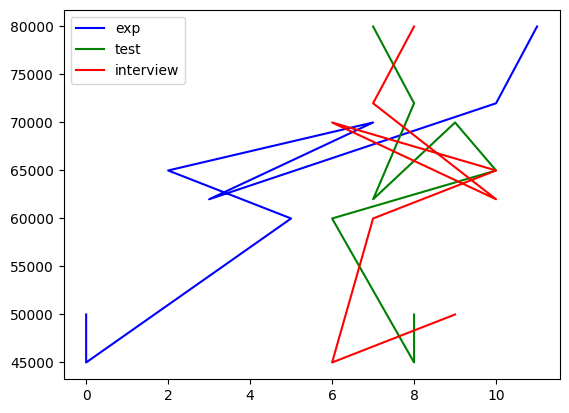

In [26]:
plt.plot(df.experience,df["salary($)"], color = "blue" , label = "exp")
plt.plot(df.test_score,df["salary($)"], color = "green" , label = "test")
plt.plot(df.interview_score,df["salary($)"], color = "red" , label = "interview")

plt.legend()

In [27]:
reg = linear_model.LinearRegression()
reg.fit(df[["experience" , "test_score" , "interview_score"]] , df["salary($)"])

LinearRegression()

In [28]:
reg.predict([[2,9,6]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [29]:
reg.predict([[12,10,10]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])

In [30]:
reg.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [31]:
reg.intercept_

17737.263464337688

In [32]:
2812.95487627*12 + 1845.70596798*10 + 2205.24017467*10 + 17737.263464337688

92002.18340607767